In [14]:
import torch
from data import create_dataset
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class Opt:
    dataroot = "gs://arkadip-uie-store/dataset/underwater_dark"
    phase = "train"
    max_dataset_size = float('inf')
    direction = "AtoB"
    input_nc = 3
    output_nc = 3
    serial_batches = False
    preprocess = "resize_and_crop"
    no_flip = False
    load_size = 286
    crop_size = 256
    batch_size = 2
    num_threads = 0

In [4]:
ds= create_dataset(Opt())

Using Bucket: arkadip-uie-store for fetching dataset
dataset [CustomDataset] was created


In [5]:
ds_i = iter(ds)

In [17]:
def tensor2im(input_image, imtype=np.uint8):
    """Converts a Tensor array into a numpy image array.

    :param input_image: the input image tensor array
    :param imtype: the desired type of the converted numpy array
    :return: Converted Image
    """
    if not isinstance(input_image, np.ndarray):
        if isinstance(input_image, torch.Tensor):  # get the data from a variable
            image_tensor = input_image.data
        else:
            return input_image
        image_numpy = image_tensor.cpu().float().numpy()  # convert it into a numpy array
        if image_numpy.shape[0] == 1:  # grayscale to RGB
            image_numpy = np.tile(image_numpy, (3, 1, 1))

        # post-processing: transpose and scaling
        image_numpy = (np.transpose(image_numpy, (1, 2, 0)) + 1) / 2.0 * 255.0
    else:  # if it is a numpy array, do nothing
        image_numpy = input_image
    return image_numpy.astype(imtype)

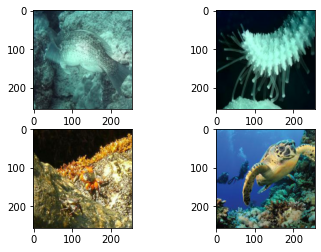

In [19]:
x = next(ds_i)

fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0, 0].imshow(tensor2im(x['A'][0]))
ax[0, 1].imshow(tensor2im(x['A'][1]))
ax[1, 0].imshow(tensor2im(x['B'][0]))
ax[1, 1].imshow(tensor2im(x['B'][1]))